In [34]:
import os 
from dotenv import load_dotenv
load_dotenv()
os.environ['GROQ_API_KEY'] = os.getenv("GROQ_API_KEY")
groq_api_key = os.getenv("GROQ_API_KEY")
os.environ['HF_TOKEN'] = os.getenv("HF_TOKEN")

In [35]:
from langchain_groq import ChatGroq
model = ChatGroq(model="openai/gpt-oss-120b", api_key=groq_api_key)
model.invoke("hi")

AIMessage(content='Hello! How can I help you today?', additional_kwargs={'reasoning_content': 'The user just says "hi". We need to respond politely. No special instructions. So just greet back.'}, response_metadata={'token_usage': {'completion_tokens': 41, 'prompt_tokens': 72, 'total_tokens': 113, 'completion_time': 0.081704307, 'prompt_time': 0.002656199, 'queue_time': 0.052495561, 'total_time': 0.084360506}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_e10890e4b9', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--cd257475-0695-4123-a17f-1c079e26403c-0', usage_metadata={'input_tokens': 72, 'output_tokens': 41, 'total_tokens': 113})

In [36]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [37]:
urls=[
    "https://langchain-ai.github.io/langgraph/tutorials/introduction/",
    "https://langchain-ai.github.io/langgraph/tutorials/workflows/",
    "https://langchain-ai.github.io/langgraph/how-tos/map-reduce/"
]
docs = [WebBaseLoader(url).load() for url in urls]
docs

[[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/introduction/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')],
 [Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='\n\n\n\n\n\n\n\n\n\n\n\nWorkflows & agents\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\n            \n            \nOur new LangChain Academy Course Deep Research with LangGraph is now live! Enroll for free.\n\n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              Workflows & agents\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            Initializing s

In [38]:
from langchain_core.tools.retriever import create_retriever_tool

In [39]:
embeddings = HuggingFaceEmbeddings(model="all-MiniLM-L6-v2")

In [40]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)

In [41]:
doc_list = [ items for sublist in docs for items in sublist]
splitted_document = text_splitter.split_documents(doc_list)

vector_store_langraph = FAISS.from_documents(documents=splitted_document, embedding=embeddings)
retriever_langgraph = vector_store_langraph.as_retriever()
retriever_langgraph_tool = create_retriever_tool(
    retriever=retriever_langgraph,
    name="retriever_vector_db_blog_langgraph",
    description="Search and run information about langgraph"
)

In [42]:
langchain_urls=[
    "https://python.langchain.com/docs/tutorials/",
    "https://python.langchain.com/docs/tutorials/chatbot/",
    "https://python.langchain.com/docs/tutorials/qa_chat_history/"
]

docs = [WebBaseLoader(url).load() for url in urls]
docs

[[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/introduction/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')],
 [Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='\n\n\n\n\n\n\n\n\n\n\n\nWorkflows & agents\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\n            \n            \nOur new LangChain Academy Course Deep Research with LangGraph is now live! Enroll for free.\n\n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              Workflows & agents\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            Initializing s

In [43]:
doct_list = [items for sublist in docs for items in sublist]
doc_split = text_splitter.split_documents(doct_list)

vector_store_lanchain = FAISS.from_documents(
    documents=doc_split,
    embedding=embeddings
    )
retriever_langchain = vector_store_lanchain.as_retriever()
retriever_langchain_tool = create_retriever_tool(
    retriever=retriever_langchain,
    name="retriever_vector_langchain_blog",
    description="Search and run about langgraph"
)

In [44]:
tools = [retriever_langchain_tool, retriever_langgraph_tool]

In [45]:
from typing import Annotated, Sequence
from typing_extensions import TypedDict
from langchain_core.messages import HumanMessage, BaseMessage
from langgraph.graph import add_messages

class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [46]:
def agent(state):
    """
    Invokes the agent model to generate a response based on current state. Given
    the question, it will decide to retrieve using the retriever tool, or simply end.
    Args:
        state(messsage): The current State

    Return:
        dict: The updated state with the agent response appended to messages
    """
    print("---CALL AGENT---")
    messages = state["messages"]
    model_with_tools = model.bind_tools(tools)
    response = model_with_tools.invoke(messages)
    return {"messages": [response]}

In [47]:
from typing import Literal
from pydantic import BaseModel, Field
from langchain_core.prompts import PromptTemplate
def grade_document(state) -> Literal["generate", "rewrite"]:
    """
    determines whether the retrieved document is releavent to the question.
    Args:
        state(message): The current state
    return:
        str: A decision for whether the documents are relevent or not
    """
    print("---CHECK RELAVANCE---")

    class grade(BaseModel):
        """Binary score for releavant check."""
        binary_score:Literal['yes', 'no']=Field(description="Relevance score 'yes' or 'no'")

    llm_with_validation = model.with_structured_output(grade)

    prompt = PromptTemplate(
        template="""
                You are a grader assessting relavance of a retrieved document to a user question. \n
                Here is the retrieved document: \n\n{context}\n\n
                Here is the user question : \n\n{question}\n\n
                If the document contains keyword(s) or sematic meaning related to user question, greade it as relavant. \n
                Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.
                """,
                input_variables=["content", "question"]
    )

    chain = prompt | llm_with_validation
    messages = state['messages']
    last_message = messages[-1]
    question = messages[0].content
    docs = last_message.content

    score_result = chain.invoke({"question":question, "context": docs})
    score = score_result.binary_score

    if score == "yes":
        print("--DESISION: DOCS RELEVANT---")
        return "generate"
    else:
        print("--DESISION: DOCS NOT RELEVANT---")
        print(score)
        return "rewrite"


In [48]:
from langchain import hub
from langchain_core.output_parsers import StrOutputParser
def generate(state):
    """
    Generate answer
    Args:
        state(messages):The current state

    Returns:
        dict: The updated message
    """
    print("---GENERATE---")
    messages = state["messages"]
    question = messages[0].content
    last_message = messages[-1]

    docs = last_message.content
    prompt = hub.pull("rlm/rag-prompt")

    def format_docs(docs):
        return "\n\n".join(doc.page_content for doc in docs)
    
    rag_chain = prompt|model| StrOutputParser()

    respone = rag_chain.invoke({"context":docs, "question":question})
    return{"messages":[respone]}


In [49]:
def rewrite(state):
    """
    Transform the query to produce a better question.

    Args:
        state(message): The current state
    return:
        dict: The updated state with rephrased question
    """

    print("---TRANSFORM QUERY---")
    messages = state["messages"]
    question = messages[0].content

    msg = [
        HumanMessage(
            content=f"""\n
    Look at the input and try to reason about the underlying semantic intent/ meaning. \n
    Here is the initial question:
    \n-----\n
    {question}
    \n-----\n
    Formulate an improved question:""",
        )
    ]

    response = model.invoke(msg)
    return {"messages": [response]}

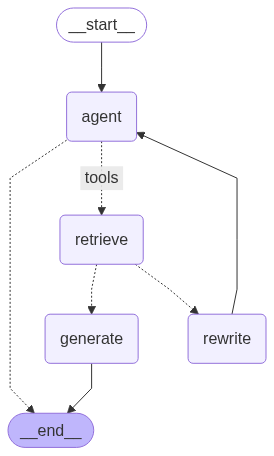

In [50]:
from langgraph.graph import END, START, StateGraph
from langgraph.prebuilt import ToolNode, tools_condition
from IPython.display import display, Image

workflow = StateGraph(AgentState)
workflow.add_node("agent", agent)
workflow.add_node("retrieve", ToolNode(tools))
workflow.add_node("generate", generate)
workflow.add_node("rewrite", rewrite)

workflow.add_edge(START, "agent")
workflow.add_conditional_edges(
                "agent",
                tools_condition,
                {
                    "tools":"retrieve",
                    END:END
                }
)
workflow.add_conditional_edges(
                "retrieve",
                grade_document)
workflow.add_edge("generate", END)
workflow.add_edge("rewrite", "agent")

graph = workflow.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [53]:
graph.invoke({"messages": "What is langgraph"})['messages'][-1].content

---CALL AGENT---
---CHECK RELAVANCE---
--DESISION: DOCS RELEVANT---
---GENERATE---


'LangGraph is a LangChain extension for building composable workflows and agentic systems. It adds a persistence layer for human‑in‑the‑loop control, short‑ and long‑term memory, streaming of intermediate states, and easy deployment with observability. It also supports orchestrator‑worker patterns, allowing dynamic creation of worker nodes that share state with an orchestrator.'